In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from disparitySSD import disparitySSD

import warnings
warnings.filterwarnings("ignore")

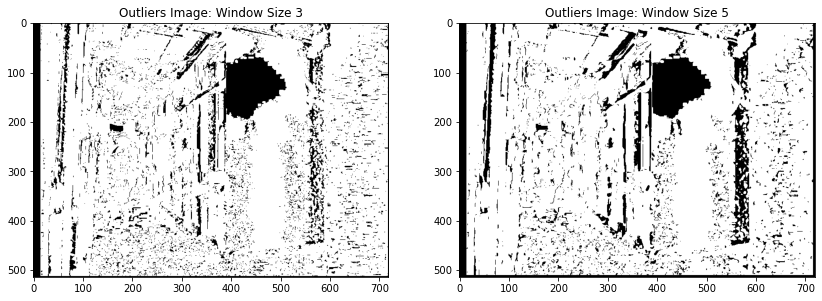

In [36]:
def detectOutliers(disparityLeft2Right, disparityRight2Left, userThresh):

    siz = np.shape(disparityLeft2Right)
    outliersImg = np.zeros(siz)
    
    for row in range(0, siz[0]):
        for col in range(0, siz[1]):
            
            # Inliers
            if (disparityLeft2Right[row, col] - disparityRight2Left[row, col]) <= userThresh:
                outliersImg[row,col] = 0
            # Outliers
            else:
                outliersImg[row,col] = 1
                
    return outliersImg

# Reading images
leftImg = cv2.imread('frameLeftgray.png', 0)
rightImg = cv2.imread('frameRightgray.png', 0)
                
# Calling L2R and R2L disparity maps for window size 3 and 5             
disparityLeft2Right_3 = disparitySSD(leftImg, rightImg, 3, 15)
disparityRight2Left_3 = disparitySSD(rightImg, leftImg, 3, 15)

disparityLeft2Right_5 = disparitySSD(leftImg, rightImg, 5, 15)
disparityRight2Left_5 = disparitySSD(rightImg, leftImg, 5, 15)
 
    
# Calling detectOutliers function for window size 3 and 5
outliersImg3 = detectOutliers(disparityLeft2Right_3, disparityRight2Left_3, 1)
outliersImg5 = detectOutliers(disparityLeft2Right_5, disparityRight2Left_5, 1)

# Subplots
fig = plt.figure(figsize=(14,10))

plt.subplot(1, 2, 1)
plt.title('Outliers Image: Window Size 3')
plt.imshow(outliersImg3, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Outliers Image: Window Size 5')
plt.imshow(outliersImg5, cmap='gray')